In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
def stdnorm(X):
    """
    Inputs:
    - X: A numpy array of shape (N, D)
    Returns:
    A numpy array of shape (N, D) where Y[i] contains the same data as X[i],
    but normalized to have zero mean and unit standard deviation.
    Hint: Use the axis argument for calculations along the correct axis.
    Use the keepdims argument to be able to do broadcasting.
    """
    return (X - X.mean(axis=0, keepdims=True)) / X.std(axis=0, keepdims=True)
N = 10
D = 3
x_org = np.arange(1, N+1).reshape(N,1) @ np.arange(1, D+1).reshape(1,D)
x_org = np.arange(1, N+1)[..., np.newaxis] * np.arange(1, D+1)
print(x_org.shape)
print(x_org)
x_norm = stdnorm(x_org)
print(x_norm)
print('Mean:', np.mean(x_norm, axis=0))
print('Std:', np.std(x_norm, axis=0))

(10, 3)
[[ 1  2  3]
 [ 2  4  6]
 [ 3  6  9]
 [ 4  8 12]
 [ 5 10 15]
 [ 6 12 18]
 [ 7 14 21]
 [ 8 16 24]
 [ 9 18 27]
 [10 20 30]]
[[-1.5666989  -1.5666989  -1.5666989 ]
 [-1.21854359 -1.21854359 -1.21854359]
 [-0.87038828 -0.87038828 -0.87038828]
 [-0.52223297 -0.52223297 -0.52223297]
 [-0.17407766 -0.17407766 -0.17407766]
 [ 0.17407766  0.17407766  0.17407766]
 [ 0.52223297  0.52223297  0.52223297]
 [ 0.87038828  0.87038828  0.87038828]
 [ 1.21854359  1.21854359  1.21854359]
 [ 1.5666989   1.5666989   1.5666989 ]]
Mean: [-1.11022302e-16 -1.11022302e-16 -1.11022302e-16]
Std: [1. 1. 1.]


Accuracy: 100.00%


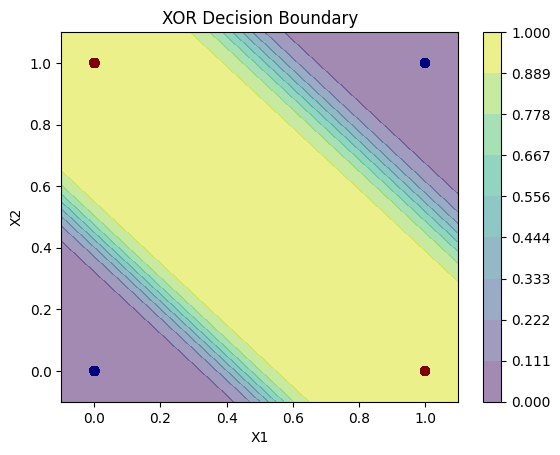

In [37]:
dataset = pd.read_csv('Xor_Dataset.csv')
X = dataset.iloc[:, 0:2].values  
Y = dataset.iloc[:, -1].values.reshape(-1, 1) 

#49.52% accuracy 
#update: it is not about parameters about learning rate and iteration!
w1 = np.random.rand(2, 2)
b1 = np.random.rand(2, 1)
w2 = np.random.rand(1, 2)
b2 = np.random.rand(1, 1)

'''
w1 = np.random.rand(4, 2)  # Increase the number of neurons in the hidden layer
b1 = np.random.rand(4, 1)
w2 = np.random.rand(1, 4)  # Adjust the output layer weights accordingly
b2 = np.random.rand(1, 1)
'''
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)
'''
    instead of sigmoid activation function I could have used ReLu, but 
    it does not make any sense since if we are going to use binary 
    classification.
    like:

    def relu(x):
    return np.maximum(0, x)

    def relu_derivative(x):
    return np.where(x > 0, 1, 0)
'''
num_iterations = 10000
learning_rate = 0.001
for i in range(num_iterations):
    z1 = np.dot(w1, X.T) + b1
    layer_1_activation = sigmoid(z1)
    
    z2 = np.dot(w2, layer_1_activation) + b2
    layer_2_activation = sigmoid(z2)

    # Backward pass (calculations for gradients remain the same)
    error_layer_2 = layer_2_activation - Y.T
    gradient_z2 = error_layer_2 * sigmoid_derivative(layer_2_activation)
    
    gradient_w2 = np.dot(gradient_z2, layer_1_activation.T)
    gradient_b2 = np.sum(gradient_z2, axis=1, keepdims=True)
    
    error_layer_1 = np.dot(w2.T, gradient_z2)
    gradient_z1 = error_layer_1 * sigmoid_derivative(layer_1_activation)
    
    gradient_w1 = np.dot(gradient_z1, X)
    gradient_b1 = np.sum(gradient_z1, axis=1, keepdims=True)

    # Update weights and biases with learning rate
    w1 -= learning_rate * gradient_w1
    b1 -= learning_rate * gradient_b1
    w2 -= learning_rate * gradient_w2
    b2 -= learning_rate * gradient_b2

'''
*-*-*--*-*-*--*-*-*-*-*--*-*-*-*-*-*-*-*-*-*-*-*-*-*
this part taken from chatgpt for only to see the plot.
*-*-*--*-*-*--*-*-*-*-*--*-*-*-*-*-*-*-*-*-*-*-*-*-*
'''
grid_x = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100)
grid_y = np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 100)
xx, yy = np.meshgrid(grid_x, grid_y)
grid = np.c_[xx.ravel(), yy.ravel()]

# Calculate accuracy
predictions = sigmoid(z2)  
predicted_classes = predictions > 0.5
actual_classes = Y.T == 1

accuracy = np.mean(predicted_classes == actual_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

z1 = np.dot(w1, grid.T) + b1
a1 = sigmoid(z1)
z2 = np.dot(w2, a1) + b2
a2 = sigmoid(z2)
zz = a2.reshape(xx.shape)

plt.contourf(xx, yy, zz, alpha=0.5, levels=np.linspace(0, 1, 10))
plt.colorbar()
plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0], cmap='jet')
plt.title('XOR Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [5]:
data = pd.read_csv('admissionv2.csv')

X = data.iloc[:,1 :-1].values 
Y = data.iloc[:, -1].values.reshape(-1, 1)  

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [6]:
class TwoLayerMLP:
    def __init__(self, input_size, hidden_size, output_size, reg_lambda):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.reg_lambda = reg_lambda
        self.init_weights()
        self.zero_grad()

    def init_weights(self):
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))  

    def zero_grad(self):
        self.dW1 = np.zeros_like(self.W1)
        self.db1 = np.zeros_like(self.b1)
        self.dW2 = np.zeros_like(self.W2)
        self.db2 = np.zeros_like(self.b2)

    def update_weights(self, learning_rate):
        self.W1 -= learning_rate * self.dW1
        self.b1 -= learning_rate * self.db1
        self.W2 -= learning_rate * self.dW2
        self.b2 -= learning_rate * self.db2

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def sigmoid_derivative(self, Z):
        s = self.sigmoid(Z)
        return s * (1 - s)

    def forward(self, X, Y=None):
        self.X = X
        if Y is not None:
            self.Y = Y
            
        self.Z1 = self.sigmoid(np.dot(X, self.W1) + self.b1)
        self.H1 = self.Z1
        self.Z2 = np.dot(self.Z1, self.W2) + self.b2
        self.H2 = self.Z2
                       
        return self.H2

    def compute_loss(self, Y_pred=None, Y=None):
        if Y_pred is None:
            Y_pred = self.H2  
        if Y is None:
            Y = self.Y

        batch_size = Y.shape[0]
        data_loss = np.sum((Y_pred - Y) ** 2) / batch_size
        reg_loss = (self.reg_lambda / 2) *(np.sum(np.square(self.W1))+np.sum(np.square(self.W2))) / batch_size
        loss = data_loss + reg_loss
        
        return loss

    def backward(self):
        Y_pred = self.H2 
        Y = self.Y
        X = self.X
        batch_size = Y.shape[0]

        dZ2 = (Y_pred - Y) * self.sigmoid_derivative(self.Z2)
        self.dW2 = (np.dot(self.H1.T, dZ2) + self.reg_lambda * self.W2) / batch_size
        self.db2 = np.sum(dZ2, axis=0, keepdims=True) / batch_size

        dZ1 = np.dot(dZ2, self.W2.T) * self.sigmoid_derivative(self.Z1)
        self.dW1 = (np.dot(X.T, dZ1) + self.reg_lambda * self.W1) / batch_size
        self.db1 = np.sum(dZ1, axis=0, keepdims=True) / batch_size



In [7]:
model = TwoLayerMLP(input_size=X_train.shape[1], hidden_size=10, output_size=1, reg_lambda=0.01)

epochs = 1000
learning_rate = 0.01

for epoch in range(epochs):
    Y_pred = model.forward(X_train, Y_train)
    loss = model.compute_loss(Y_pred, Y_train)
    model.backward()
    model.update_weights(learning_rate)
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")


Epoch 0, Loss: 0.500097051941257
Epoch 100, Loss: 0.105047271726871
Epoch 200, Loss: 0.0357040142441737
Epoch 300, Loss: 0.022306996292347833
Epoch 400, Loss: 0.01944532645951627
Epoch 500, Loss: 0.018695614584108046
Epoch 600, Loss: 0.018384675526380963
Epoch 700, Loss: 0.01816806185260118
Epoch 800, Loss: 0.017973446148407367
Epoch 900, Loss: 0.017785378359400816


> - The code above shows the result without SGD included momentum.
> - Down below it shows with momentum!

In [8]:
class TwoLayerMLP:
    def __init__(self, input_size, hidden_size, output_size, reg_lambda, momentum=0.9):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.reg_lambda = reg_lambda
        self.momentum = momentum
        self.init_weights()
        self.zero_grad()
        self.init_velocity()

    def init_weights(self):
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))

    def init_velocity(self):
        self.vW1 = np.zeros_like(self.W1)
        self.vb1 = np.zeros_like(self.b1)
        self.vW2 = np.zeros_like(self.W2)
        self.vb2 = np.zeros_like(self.b2)

    def zero_grad(self):
        self.dW1 = np.zeros_like(self.W1)
        self.db1 = np.zeros_like(self.b1)
        self.dW2 = np.zeros_like(self.W2)
        self.db2 = np.zeros_like(self.b2)

    def update_weights(self, learning_rate):
        # velocities
        self.vW1 = self.momentum * self.vW1 - learning_rate * self.dW1
        self.vb1 = self.momentum * self.vb1 - learning_rate * self.db1
        self.vW2 = self.momentum * self.vW2 - learning_rate * self.dW2
        self.vb2 = self.momentum * self.vb2 - learning_rate * self.db2
        
        # momentum
        self.W1 += self.vW1
        self.b1 += self.vb1
        self.W2 += self.vW2
        self.b2 += self.vb2

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def sigmoid_derivative(self, Z):
        s = self.sigmoid(Z)
        return s * (1 - s)

    def forward(self, X, Y=None):
        self.X = X
        if Y is not None:
            self.Y = Y
            
        self.Z1 = self.sigmoid(np.dot(X, self.W1) + self.b1)
        self.H1 = self.Z1
        self.Z2 = np.dot(self.Z1, self.W2) + self.b2
        self.H2 = self.Z2
                       
        return self.H2

    def compute_loss(self, Y_pred=None, Y=None):
        if Y_pred is None:
            Y_pred = self.H2  
        if Y is None:
            Y = self.Y

        batch_size = Y.shape[0]
        data_loss = np.sum((Y_pred - Y) ** 2) / batch_size
        reg_loss = (self.reg_lambda / 2) *(np.sum(np.square(self.W1))+np.sum(np.square(self.W2))) / batch_size
        loss = data_loss + reg_loss
        
        return loss

    def backward(self):
        Y_pred = self.H2 
        Y = self.Y
        X = self.X
        batch_size = Y.shape[0]

        dZ2 = (Y_pred - Y) * self.sigmoid_derivative(self.Z2)
        self.dW2 = (np.dot(self.H1.T, dZ2) + self.reg_lambda * self.W2) / batch_size
        self.db2 = np.sum(dZ2, axis=0, keepdims=True) / batch_size

        dZ1 = np.dot(dZ2, self.W2.T) * self.sigmoid_derivative(self.Z1)
        self.dW1 = (np.dot(X.T, dZ1) + self.reg_lambda * self.W1) / batch_size
        self.db1 = np.sum(dZ1, axis=0, keepdims=True) / batch_size



In [9]:
model = TwoLayerMLP(input_size=X_train.shape[1], hidden_size=10, output_size=1, reg_lambda=0.01)

epochs = 1000
learning_rate = 0.01

for epoch in range(epochs):
    Y_pred = model.forward(X_train, Y_train)
    loss = model.compute_loss(Y_pred, Y_train)
    model.backward()
    model.update_weights(learning_rate)
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")


Epoch 0, Loss: 0.5633119676018145
Epoch 100, Loss: 0.01798809318757625
Epoch 200, Loss: 0.016287768986609108
Epoch 300, Loss: 0.014762173609923497
Epoch 400, Loss: 0.013370088902297175
Epoch 500, Loss: 0.012098736523526617
Epoch 600, Loss: 0.010942040746661436
Epoch 700, Loss: 0.009897490153542908
Epoch 800, Loss: 0.008963798325233292
Epoch 900, Loss: 0.008139258557163206


# Root Mean Square Error (RMSE)

$$
\text{RMSE} = \sqrt{\frac{\sum_{i=1}^{n} (P_i - O_i)^2}{n}} 
$$

Where 
$$
(P_i)
$$
represents the predicted value for the (i)th observation.
$$
(O_i)
$$
 represents the observed (actual) value for the (i)th observation.
- (n) is the sample size.

> ### Description:
- Provides a measure of the magnitude of errors between the predictions of the model and the actual observed values. A lower RMSE value indicates better performance, suggesting that the model's predictions are closer to the actual values.


- Range: The range of RMSE is from 0 to infinity.





# R-Squared (R²)

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \bar{y})2}{\sum_{i=1}{n} (y_i - \hat{y}_i)^2} 
$$

Where 

$$
(y_i)
$$ 
represents the observed (actual) value for the (i)th observation.
$$
(\bar{y})
$$

represents the mean of the observed values.
$$
(\hat{y}_i) 
$$
represents the predicted value for the (i)th observation.

> ### Description
- R^2 (Coefficient of Determination): Measures how well future samples are likely to be predicted by the model. A higher R^2 value indicates better performance, showing that the model can explain a higher proportion of the variance.

Range: from negative infinity to 1.
> - 1:This indicates a perfect fit, meaning the model's predictions perfectly match the observed outcomes.
> - 0: Suggests the model performs no better than a simple mean of the observed outcomes. In this case, the model fails to capture any of the variance in the data.
> - Negative Values: These occur when the model performs worse than a simple mean prediction. Negative R^2 values indicate that the model's predictions are, on average, less accurate than a simple average of the observed outcomes.





In [11]:
class TwoLayerMLP:
    def __init__(self, input_size, hidden_size, output_size, reg_lambda, momentum=0.9):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.reg_lambda = reg_lambda
        self.momentum = momentum
        self.init_weights()
        self.init_velocity()

    def init_weights(self):
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))

    def init_velocity(self):
        self.vW1 = np.zeros_like(self.W1)
        self.vb1 = np.zeros_like(self.b1)
        self.vW2 = np.zeros_like(self.W2)
        self.vb2 = np.zeros_like(self.b2)

    def update_weights(self, learning_rate):
        self.vW1 = self.momentum * self.vW1 - learning_rate * self.dW1
        self.vb1 = self.momentum * self.vb1 - learning_rate * self.db1
        self.vW2 = self.momentum * self.vW2 - learning_rate * self.dW2
        self.vb2 = self.momentum * self.vb2 - learning_rate * self.db2

        self.W1 += self.vW1
        self.b1 += self.vb1
        self.W2 += self.vW2
        self.b2 += self.vb2

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def sigmoid_derivative(self, Z):
        s = self.sigmoid(Z)
        return s * (1 - s)

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        
        self.A2 = self.Z2
        return self.A2

    def compute_loss(self, Y_pred, Y):
        batch_size = Y.shape[0]
        data_loss = np.sum((Y_pred - Y) ** 2) / batch_size
        reg_loss = (self.reg_lambda / 2) * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2))) / batch_size
        loss = data_loss + reg_loss
        return loss

    def backward(self, X, Y):
        Y_pred = self.forward(X)
        batch_size = Y.shape[0]

        dZ2 = (Y_pred - Y)  
        self.dW2 = np.dot(self.A1.T, dZ2) / batch_size + (self.reg_lambda * self.W2) / batch_size
        self.db2 = np.sum(dZ2, axis=0, keepdims=True) / batch_size

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.sigmoid_derivative(self.Z1)
        self.dW1 = np.dot(X.T, dZ1) / batch_size + (self.reg_lambda * self.W1) / batch_size
        self.db1 = np.sum(dZ1, axis=0, keepdims=True) / batch_size

    def train(self, X, Y, epochs, batch_size, learning_rate):
        for epoch in range(epochs):
            for i in range(0, X.shape[0], batch_size):
                X_batch = X[i:i+batch_size]
                Y_batch = Y[i:i+batch_size]
                self.forward(X_batch)
                self.backward(X_batch, Y_batch)
                self.update_weights(learning_rate)

    def predict(self, X):
        Y_pred = self.forward(X)
        return Y_pred

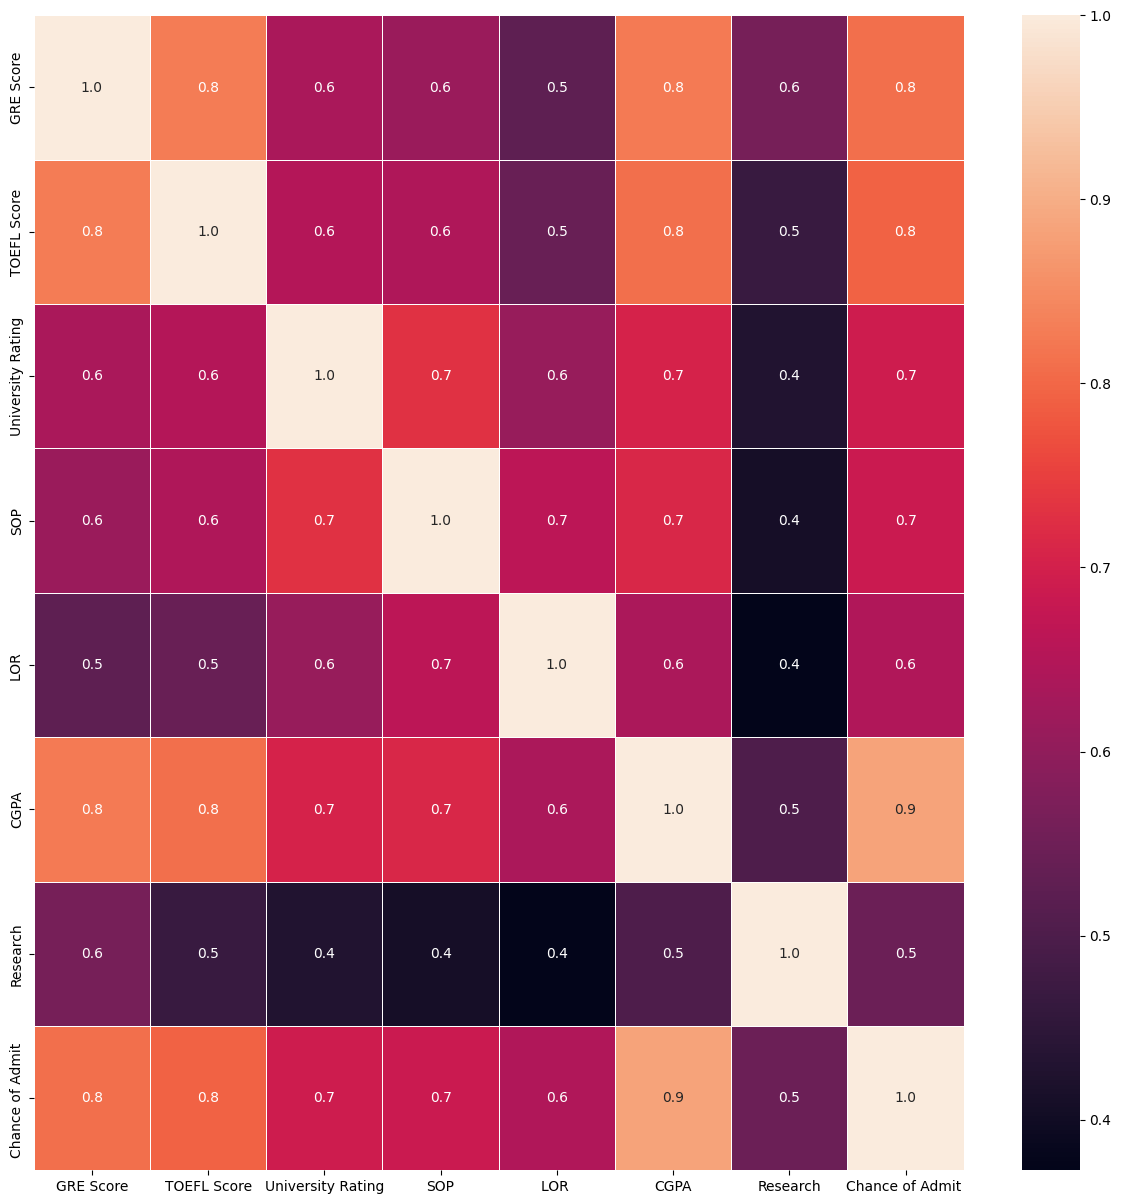

(350, 7) (150, 7)


In [12]:
# Read the dataset
dataset = pd.read_csv('admissionv2.csv')
# Explore the dataset
# Observe that the scales and centers are very different which needs to be fixed,
# and the column "Serial No." is actually just the row number so it must be removed.
dataset # To print the dataset (In a jupyter notebook there is no need to use the print command)
dataset.head(10) # Or, you can print only the first 10 lines
dataset.describe() # The basic statistical description of the dataset
# Remove the useless "Serial No."
dataset.drop('Serial No.', axis=1, inplace=True)
# Let's look at the correlations across the columns.
dataset.corr() # Print the correlations
# We can see easier when we draw a correlation heatmap
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(dataset.corr(), annot=True, linewidths=0.5, linecolor="white", fmt= '.1f',ax=ax)
plt.show()
# Which score looks like the most related to the admission chance?
# Separate the targets from the inputs
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,7].values.reshape(-1,1) # Chance of admission
# Convert to numpy arrays
X = np.array(X)
Y = np.array(Y)
# Split the training and validation sets (ensuring the same split always)
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.30,
shuffle=False, random_state=1)
# Preprocessing (by standard normalization since we observed quite different scales/centers)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) # We fit the scaler only on the training set
x_valid = scaler.transform(x_valid) # We use the resulting fit on the validation set (always!)
print(x_train.shape, x_valid.shape)



> Hidden Sizes will change first

Best R2: 0.8693860874791974, Best RMSE: 0.051610568045531685, Best Params: {'hidden_size': 80, 'learning_rate': 0.1}


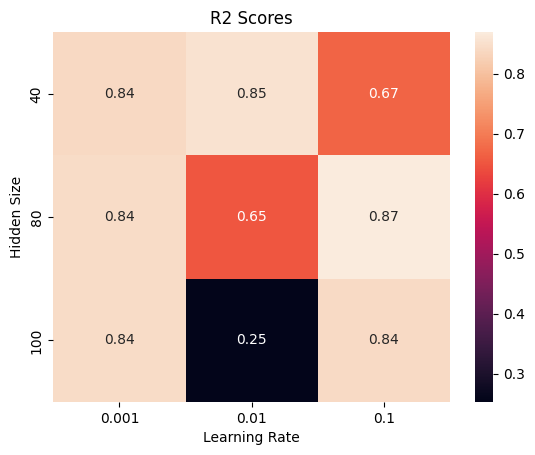

In [40]:
def grid_search(x_train, y_train, x_valid, y_valid, hidden_sizes, learning_rates, epochs, batch_size, reg_lambda, momentum):
    best_r2 = -np.inf
    best_rmse = np.inf
    best_params = {}
    r2_scores = np.zeros((len(hidden_sizes), len(learning_rates))) 

    for i, hidden_size in enumerate(hidden_sizes):
        for j, learning_rate in enumerate(learning_rates):
            model = TwoLayerMLP(input_size=x_train.shape[1], hidden_size=hidden_size, output_size=y_valid.shape[1], reg_lambda=reg_lambda, momentum=momentum)
            model.train(x_train, y_train, epochs=epochs, batch_size=batch_size, learning_rate=learning_rate)
            
            predictions = model.predict(x_valid)
            r2 = r2_score(y_valid, predictions)
            rmse = np.sqrt(mean_squared_error(y_valid, predictions))
            
            r2_scores[i, j] = r2 
            
            if r2 > best_r2:
                best_r2 = r2
                best_rmse = rmse
                best_params = {'hidden_size': hidden_size, 'learning_rate': learning_rate}

    print(f"Best R2: {best_r2}, Best RMSE: {best_rmse}, Best Params: {best_params}")
    
    sns.heatmap(r2_scores, xticklabels=learning_rates, yticklabels=hidden_sizes, annot=True, fmt=".2f")
    plt.xlabel('Learning Rate')
    plt.ylabel('Hidden Size')
    plt.title('R2 Scores')
    plt.show()

    return best_params

# hidden_sizes = [10, 50, 100]  Best R2: 0.8601205275101323, Best RMSE: 0.05340979518993237, Best Params: {'hidden_size': 10, 'learning_rate': 0.01}
# hidden_sizes = [20, 50, 100]  Best R2: 0.8604214280691275, Best RMSE: 0.0533523182456029, Best Params: {'hidden_size': 20, 'learning_rate': 0.01}
# hidden_sizes = [40, 80, 100]  Best R2: 0.8633688374343322, Best RMSE: 0.05278600584363314, Best Params: {'hidden_size': 80, 'learning_rate': 0.1}
# hidden_sizes = [40, 120, 180] Best R2: 0.8567467376357171, Best RMSE: 0.054050059979223075, Best Params: {'hidden_size': 40, 'learning_rate': 0.01}
# hidden_sizes = [80, 160, 240] checking if increasing the model complexity further improves performance? -- it is not --
hidden_sizes = [40, 80, 100]
learning_rates = [1e-3, 1e-2, 1e-1]  
epochs = 1000  
# batch_size = 32
# batch_size = 40
# batch_size = 30
batch_size = 31 # the best R^2 result so far.
#reg_lambda = 0.01
reg_lambda = 0.001  
momentum = 0.9  

best_params = grid_search(x_train, y_train, x_valid, y_valid, hidden_sizes, learning_rates, epochs, batch_size, reg_lambda, momentum)